In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tools.AutoPanorama.img_stitch import ImageStitcher

In [11]:
def get_fsi_files(folder_path):
    fsi_list = []
    fsi_frame = []
    tot_file_list = os.listdir(folder_path)
    for file in tot_file_list:
        if 'FSI' in file and ('jpg' in file or 'png' in file):
            fsi_list.append(file)
            fsi_frame.append(extract_frame_id(file))
            
    fsi_frame.sort()
    final_list = []
    for f_id in fsi_frame:
        for file in fsi_list:
            if str(f_id) in file:
                final_list.append(file)
                break
                
    return final_list
        
    
def extract_frame_id(file_name):
    temp = file_name.split('.')[0]
    f_id = int(temp.split('_')[-1])
    return f_id


def load_img(file_path):
    img = cv2.imread(file_path)
    img_g = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    return(img, img_g)

def plot_img(img, cmap=None):
    f, ax = plt.subplots(1, 1, figsize = (15, 10))
    if cmap is None:
        ax.imshow(img)
    else:
        ax.imshow(img, cmap)      
        
def plot_two_img(img1, img2):
    f, ax = plt.subplots(1, 2, figsize = (15, 7))
    ax[0].imshow(img1)
    ax[1].imshow(img2)
    
def resize_(img, size=256):
    r = min(size / img.shape[0], size
                / img.shape[1])
    resized_img = cv2.resize(
        img,
        (int(img.shape[1] * r), int(img.shape[0] * r)),
        interpolation=cv2.INTER_LINEAR,
    ).astype(np.uint8)
    
    return resized_img

def trim(frame):
    #crop top
    if not np.sum(frame[0]):
        return trim(frame[1:])
    #crop top
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    #crop top
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    #crop top
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame


In [3]:
stitch = ImageStitcher()


In [4]:
fp = r'C:\Users\Matan\Documents\Projects\Data\Slicer\from Roi\15_20_A_16\15_20_A_16'
file_list = get_fsi_files(fp)

In [5]:
for file in file_list:
    stitch.add_image(os.path.join(fp, file) ,1)

Finding features for image 01
Finding features for image 02
Matching features of 02 01
778 features matched 151 of which are good
02 <=> 01 score 151
Finding features for image 03
Matching features of 03 01
769 features matched 74 of which are good
03 <=> 01 score 74
Matching features of 03 02
769 features matched 169 of which are good
03 <=> 02 score 169
Finding features for image 04
Matching features of 04 01
773 features matched 27 of which are good
04 <=> 01 score 27
Matching features of 04 02
773 features matched 66 of which are good
04 <=> 02 score 66
Matching features of 04 03
773 features matched 151 of which are good
04 <=> 03 score 151
Finding features for image 05
Matching features of 05 01
743 features matched 16 of which are good
05 <=> 01 score 16
Matching features of 05 02
743 features matched 33 of which are good
05 <=> 02 score 33
Matching features of 05 03
743 features matched 60 of which are good
05 <=> 03 score 60
Matching features of 05 04
743 features matched 142 

719 features matched 7 of which are good
Matching features of 15 11
719 features matched 21 of which are good
15 <=> 11 score 21
Matching features of 15 12
719 features matched 34 of which are good
15 <=> 12 score 34
Matching features of 15 13
719 features matched 72 of which are good
15 <=> 13 score 72
Matching features of 15 14
719 features matched 165 of which are good
15 <=> 14 score 165
Finding features for image 16
Matching features of 16 01
714 features matched 3 of which are good
Matching features of 16 02
714 features matched 1 of which are good
Matching features of 16 03
714 features matched 2 of which are good
Matching features of 16 04
714 features matched 2 of which are good
Matching features of 16 05
714 features matched 1 of which are good
Matching features of 16 06
714 features matched 0 of which are good
Matching features of 16 07
714 features matched 2 of which are good
Matching features of 16 08
714 features matched 1 of which are good
Matching features of 16 09
714 

Finding features for image 22
Matching features of 22 01
755 features matched 2 of which are good
Matching features of 22 02
755 features matched 1 of which are good
Matching features of 22 03
755 features matched 2 of which are good
Matching features of 22 04
755 features matched 1 of which are good
Matching features of 22 05
755 features matched 2 of which are good
Matching features of 22 06
755 features matched 2 of which are good
Matching features of 22 07
755 features matched 4 of which are good
Matching features of 22 08
755 features matched 4 of which are good
Matching features of 22 09
755 features matched 4 of which are good
Matching features of 22 10
755 features matched 4 of which are good
Matching features of 22 11
755 features matched 2 of which are good
Matching features of 22 12
755 features matched 9 of which are good
Matching features of 22 13
755 features matched 4 of which are good
Matching features of 22 14
755 features matched 10 of which are good
22 <=> 14 score 1

In [6]:
result = stitch.stitch()

New edge matrix:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [ 25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [102   7   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [149 110  25   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [160 143 116  34   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [165 160 151 123  38   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0 159 142 115  51   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0 166 149 113  34   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 162 150 113  25   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]
 [  0   0   0   0 165 163 148 107  12   0   0   0   0   0   0   0   0   0

In [7]:
result.shape

(1840, 1820, 4)

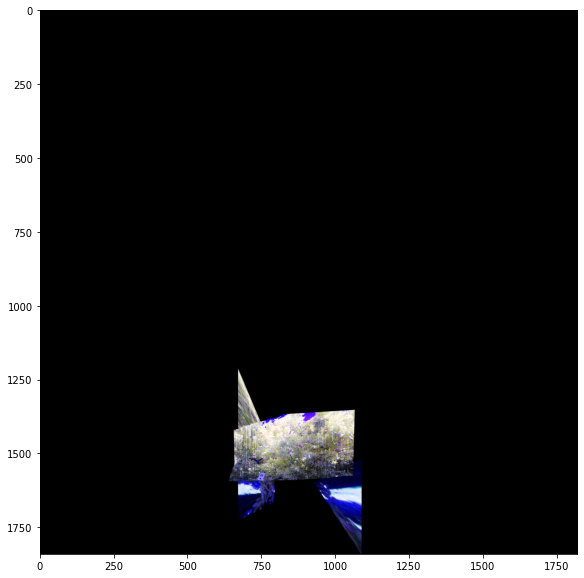

In [10]:
plot_img(result[:,:,:3])

In [14]:
o = trim(result[:,:,:3])

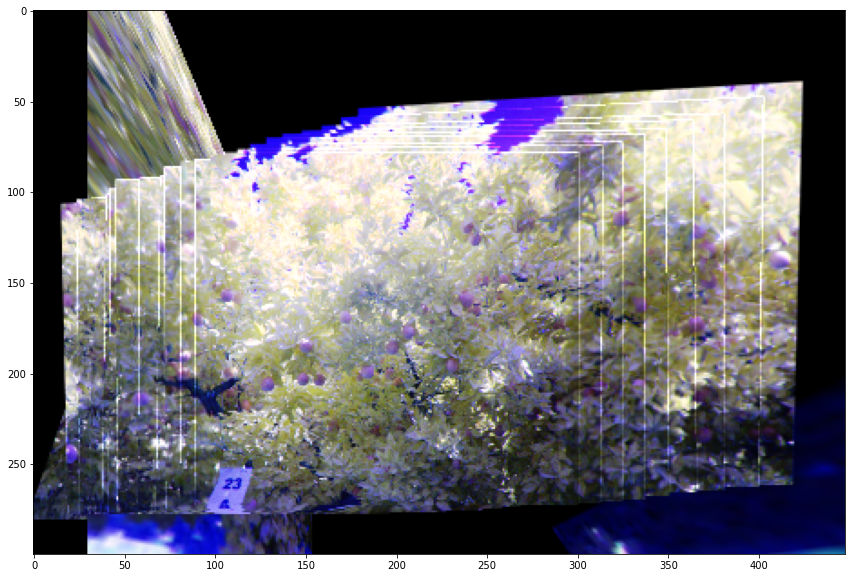

In [16]:
plot_img(o[100:400,:])